<span style="font-size:30px;">Certificate for Python in Finance</span>

<span style="font-size:26px;">Computational Finance - Practice Project 01</span>

Submitted on 27 May 2024

by Florian Munz (florian.markus.munz@gmail.com)

# Agenda

### ° A. Current understanding of central topics and tools
### ° B. Strenghts and weaknesses discovered during the week
### ° C. Experiences made throughout the exercise

-------------------------------------------------------------------------

## A. Current understanding of central topics and tools

Re-cap of the task:

The first practice project in Computational Finance is about calibrating the general market model (BCC97) to option prices.
You should use/adjust the Python codes as provided in the core Computational Financial class. No DX Analytics is required at this point.

The option prices are related to European put and call options on the German DAX index.

You should implement a calibration for three different sub-models (all with constant short rates):

●	jump-diffusion only (M76)

●	stochastic volatility only (H93)

●	stochastic volatility jump-diffusion (B96)


You should implement the calibration for different option types:

●	call options only

●	put options only

Maybe you might want to select only certain options from the data – depending on which sub-model you use.

You should then compare the performance of the three different sub-models for the two different option types (e.g. based on MSE).

## Discussion of the three different calibration models for European Call Options on the DAX Index

### Introductory note

We handle a set of call options with relatively short maturity of roughly a month (i.e., closing date 15 May 2020 and expiry date 19 June 2020).

We see from the base data, that we face elevated levels of implied volatilities that diverge between puts and calls as we move deep into the money and/or deep out the money.

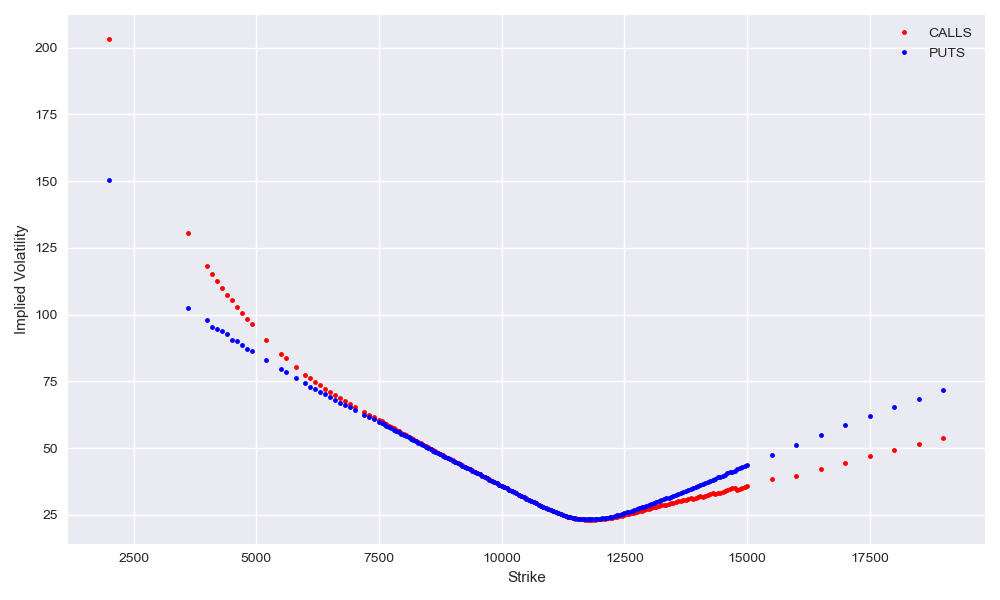

In [184]:
from IPython.display import display, Image
display(Image(filename='Imp_Volas_DAX_Base Data.png'))

When moving for the call options deep in the money (and deep out the money for puts), we see implied volatilities for the call options to be above the ones of the respective put options. Same observation holds vice versa, when moving for the put options deep in the money.

Amongst other rationale, we would explain this observation primarily with the options' respective downside risk when being deep in the money.

Other rationale amongst market participants are (i) boundaries to borrowing the underlying for short selling, (ii) dividends and/or other costs of carry being involved, (iii) limitations in market liquidity.

In addition to the above, we observe the implied volatilities' curves for both calls and puts to be fairly steep. However, this is well in line with the short term maturity of the options.

In light of the base data at hand, we would expect Merton's Jump Diffusion Model to best suited for the calibration exercise as it handles best options with short term maturities and the resulting steep implied volatility curves. 

### Performance of the Merton Jump Diffusion Model (M76) for calibration purposes

### Calibration of the premiums of European call options

We observe a strong performance of the Merton Jump Diffusion Model on the base data provided. Final MSE of the optimization procedures is at 0.395. Modelled premiums of the call options run stable against market quotes with no constant pattern and a max absolute difference in premium of 0.8, using a broad calibration sample of 21 quotes/options. Reducing the number of observations in the calibration sample, we assume, would further reduce MSE as well as max differences observed. However, we appreciate a braoder sample set ranging +/- 5% around S0.

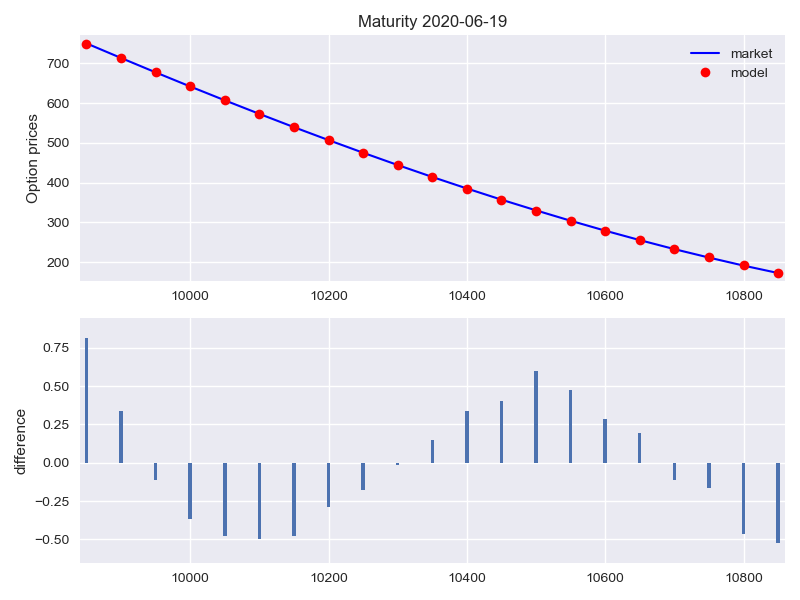

In [112]:
from IPython.display import display, Image
display(Image(filename='Valuation_DAX_M76.png'))

### Derivation of implied volatilities for European call options from the Merton Jump Diffusion Model

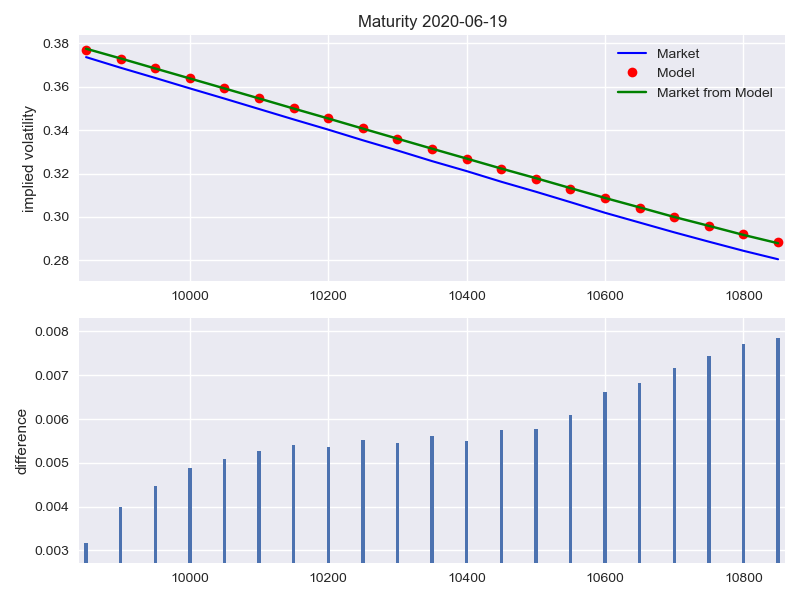

In [114]:
from IPython.display import display, Image
display(Image(filename='Imp_Volas_DAX_M76.png'))

We see the slope of the model's implied volatilities to be slightly flattened in comparison to the slope of the market's implied volatilities. As we move out the money, the difference in **"modelled volas"** vs **"market volas"** extends accordingly.

Estimated volas from market prices (quoted as "Market from Model") diverge as well from those provided with the base data, given that we assume a short rate that might differ from the one used in the base data calculations.

### Performance of the Heston Model (H93) and the Bates / GMM Model (B96 / BCC97) for calibration purposes

The base data at hand is a perfect example to highlight the limitations of the Heston model. The model is known to have its weaknesses when it comes to predicting option premiums for short-term options, as the model fails to capture the high implied volatilities - or better, the steepness of the slope of the implied vola curve.

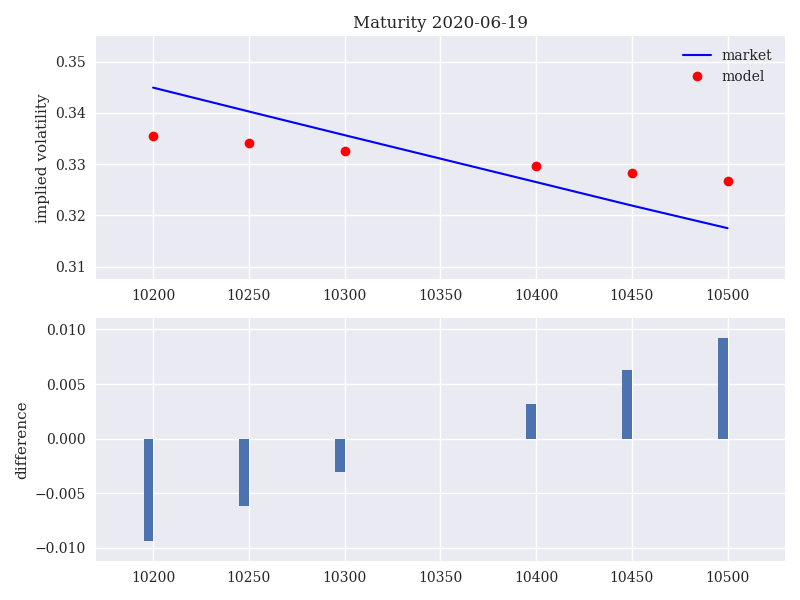

In [124]:
from IPython.display import display, Image
display(Image(filename='H93_calibration_iv_2020-06-19_DAX_2020_S0_LOW.png'))

Given the flattened curve of the implied volatilities along the observations in the calibration sample, calibration of call premiums under H93 remains weak with an MSE of 78.763 and total differences in premiums larger than (10).

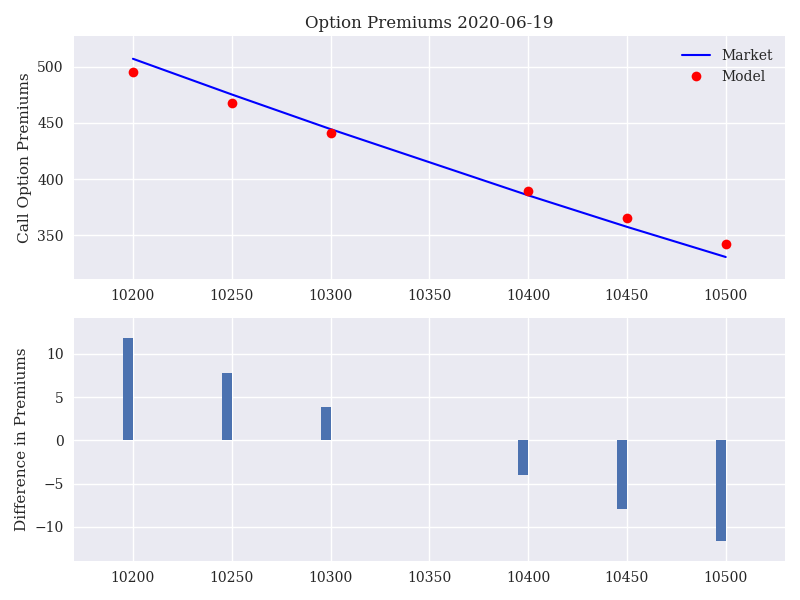

In [127]:
from IPython.display import display, Image
display(Image(filename='Option_Premiums_DAX_2020_S0_LOW.png'))

Extending H93 to B96 / BCC97, i.e. adding jump-diffusion, does not materially enhance model calibration. MSE remains with 71.835 at elevelated levels. The chart below outlines final calibrated premiums and respective differences to the market quotes.

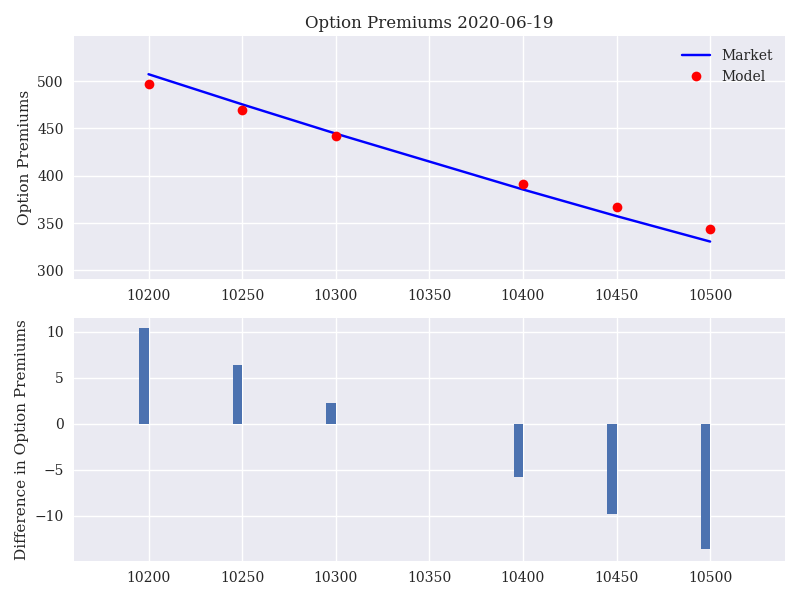

In [135]:
from IPython.display import display, Image
display(Image(filename='BCC97_jump_calibration_quotes_DAX_2020_S0_LOW.png'))

In this regard, it is helpful to analyze sensitivity of the performance of the Heston Model depending on the levels of implied volatilities. We tried to verify the DAX index levels on 15 May 2020. We found that under today's available historical market quotes, the DAX index closed 15 May 2020 at 10'465.17. Applying this quote has a material impact on the performance of the Heston Model. Implied volatilities move below 0.3 and calibration performance enhances materially. Respective calibration results are outlined below accordingly.

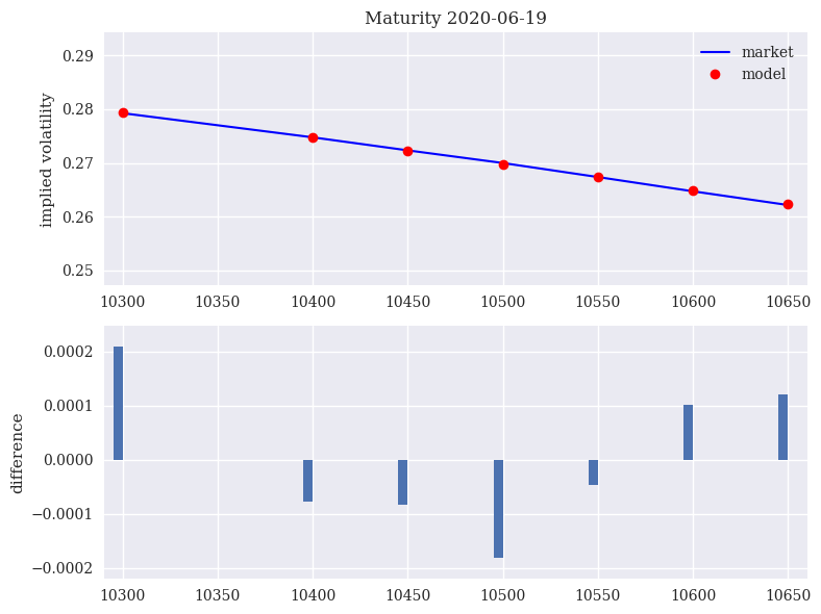

In [138]:
from IPython.display import display, Image
display(Image(filename='H93_Volas_DAX_2020_ADJ_SHORT.png'))

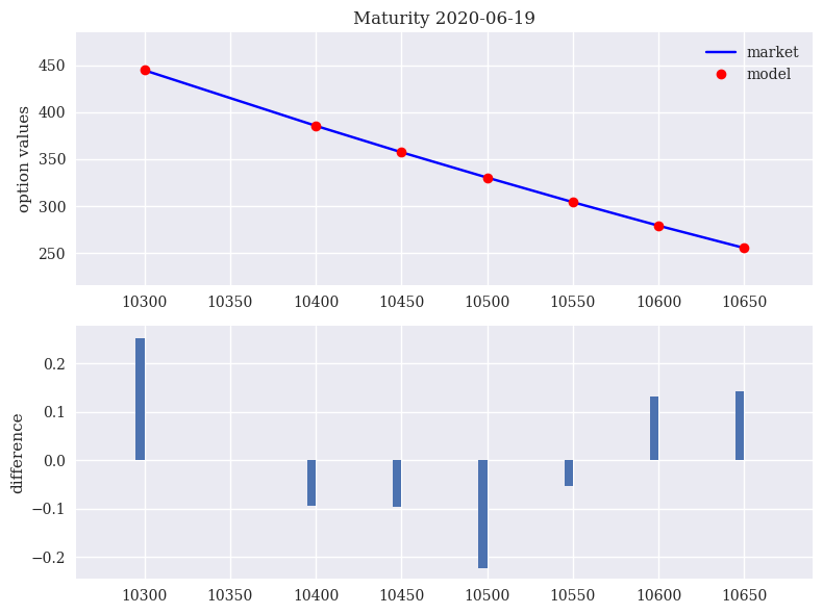

In [140]:
from IPython.display import display, Image
display(Image(filename='H93_Premiums_DAX_2020_ADJ_SHORT.png'))

In order to verify the above observation made with regard to the base data covering 2020, we tested for current market data from 24 May 2024. Currently, implied volatilities are at low levels between 0.10 and 0.13 for call options at the money. Again, this supports a much stronger perfromance of the Heston Model. However, the performance of the Heston Model still remains behind the performance of the Merton Model outlined at the very beginning of this section.

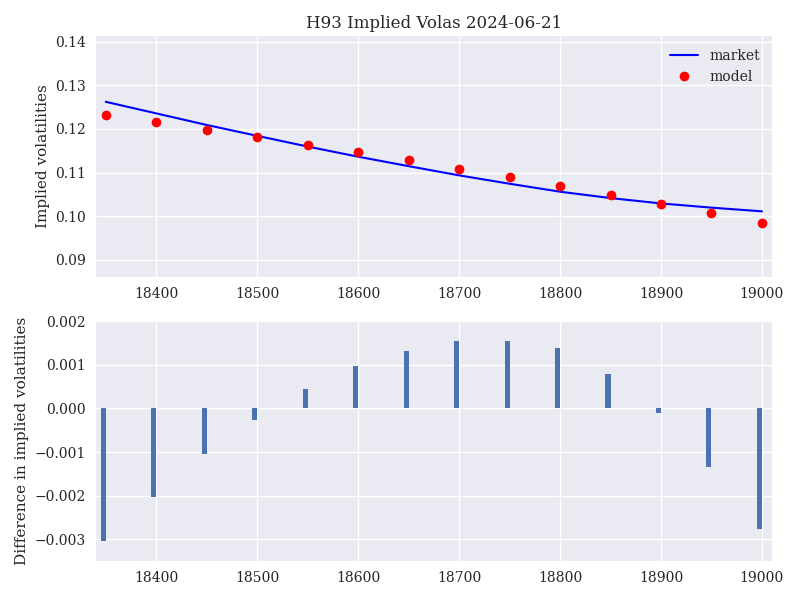

In [144]:
from IPython.display import display, Image
display(Image(filename='H93_ImpVol_DAX_2024.png'))

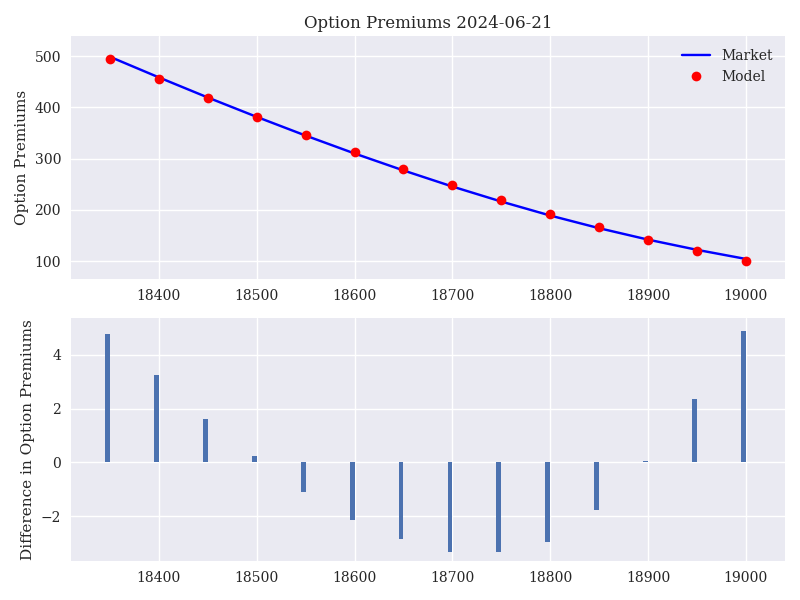

In [146]:
from IPython.display import display, Image
display(Image(filename='H93_Premiums_DAX_2024.png'))

## Discussion of the three different calibration models for European Put Options on the DAX Index

### Introductory note

We perform two approaches to estimate the premiums for put options on the Dax Index: First, we use the **Put Call Parity** and derive premiums for put options from the calibrated premiums of call options we discussed in previous section. Second, we run the calibration procedures as we did for the call options on the put options themselves.

### Derivation of put premiums using the **Put Call Parity** for Options

For the estimation of the put premiums, we use the **Put Call Parity for Options** provided per the below formula:

$$
P = C + K * e^{-rt} + D * e^{-rt} - S_{0}
$$

Respective results for the Dax Index 2020 base data are shown in the table below accordingly.

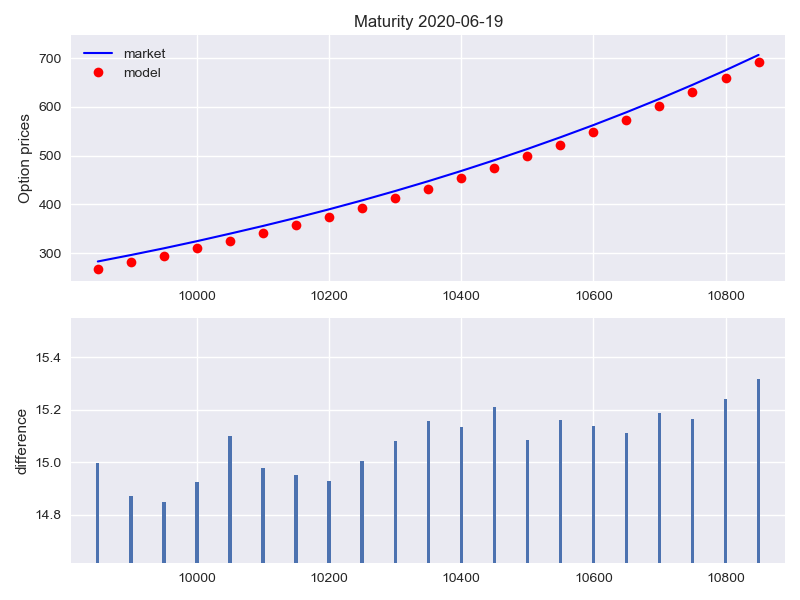

In [191]:
from IPython.display import display, Image
display(Image(filename='Put_Premiums_DAX_M76.png'))

We observe that put premiums derived from the **Put Call Parity** constantly move below the market quotes provided with the base data for respective put options.

To verify and validate this observation, we test for the **Put Call Parity** using BSM and price the put options in the first place. We do this according to the following procedure:

    - Use the implied volatilities for put options provided with the base data set.
    - Adjust the short rate r, so that derived put premiums from BSM equal the observed put premiums in the market provided with the base data.
    - Apply the Put Call Parity to derive the call premiums.

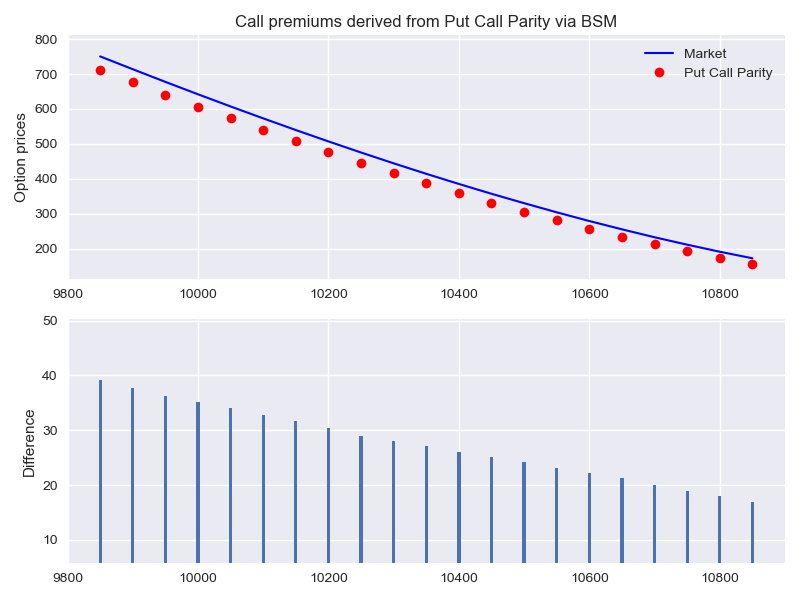

In [66]:
from IPython.display import display, Image
display(Image(filename='Put_Call_Parity_DAX_BSM.png'))

When deriving call premiums via the **Put Call Parity** from put premiums, we observe similar pattern as we did earlier when deriving put premiums from call premiums. Again, we see the modelled premiums to be constantly below the observed market premiums.

We tested as well for the **Put Call Parity** on the 2024 Dax Index data set, we used earlier for the calibration of the call option premiums. Similar to the observations made for the 2020 Dax Index data set, we see a weak **Put Call Parity** with absolute differences ranging around (15) points. We attribute these differences primarily to low liquidity levels in the market as Bid / Ask Spreads for put and call options are widened.

### Performance of the Merton Jump Diffusion Model (M76) for calibration purposes

### Calibration of premiums and implied volatilities for European put options

For the calibration procedures of put options under the Merton Model (M76), we use the DAX Index base data set of 2020. Respective results for premiums and implied volatilities are highlighted in below figures.

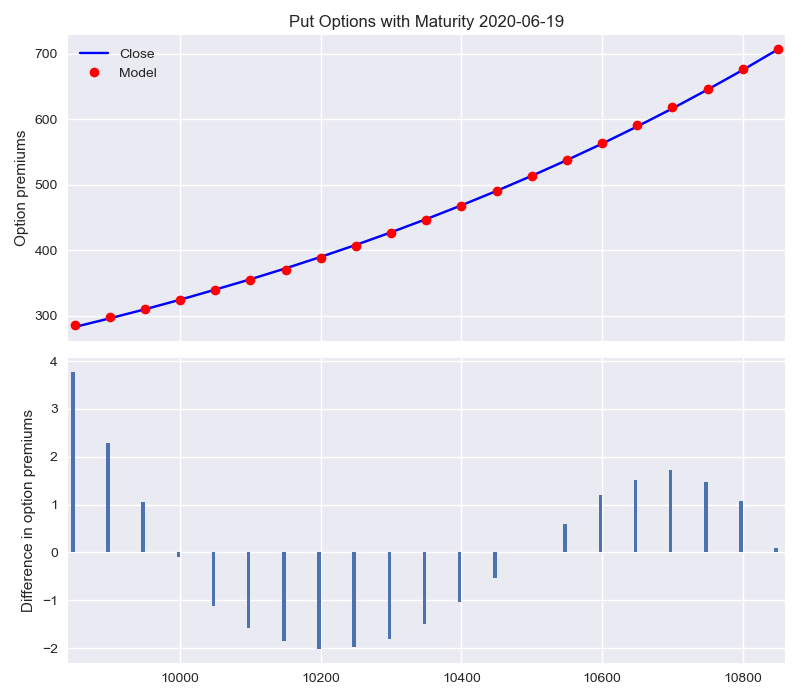

In [248]:
from IPython.display import display, Image
display(Image(filename='M76_Premiums_Put Options_DAX_2020.png'))

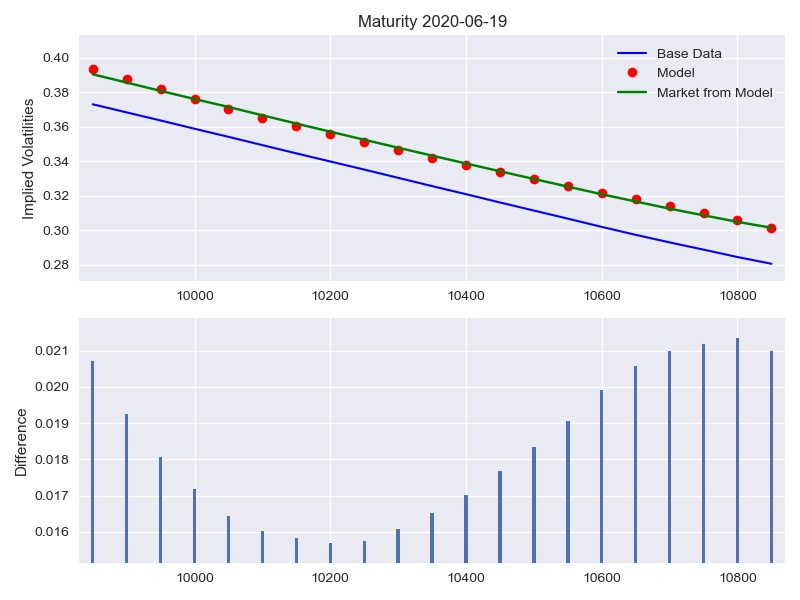

In [251]:
from IPython.display import display, Image
display(Image(filename='Imp_Volas_DAX_2020_M76_Puts.png'))

### Performance of the Heston Model (H93) and the Bates / GMM Model (B96 / BCC97) for calibration purposes

### Calibration of premiums and implied volatilities for European put options

For the calibration procedures of put options under the Heston Model (H93) and the GMM (BCC97), we use again the Dax Index data set of 2024 with lower levels of implied volatilities in order to ensure for adequate calibration results as already highlighted above when discussing the calibration results for call options. Respective results for premiums as well as implied volatilities are shown in below figures.

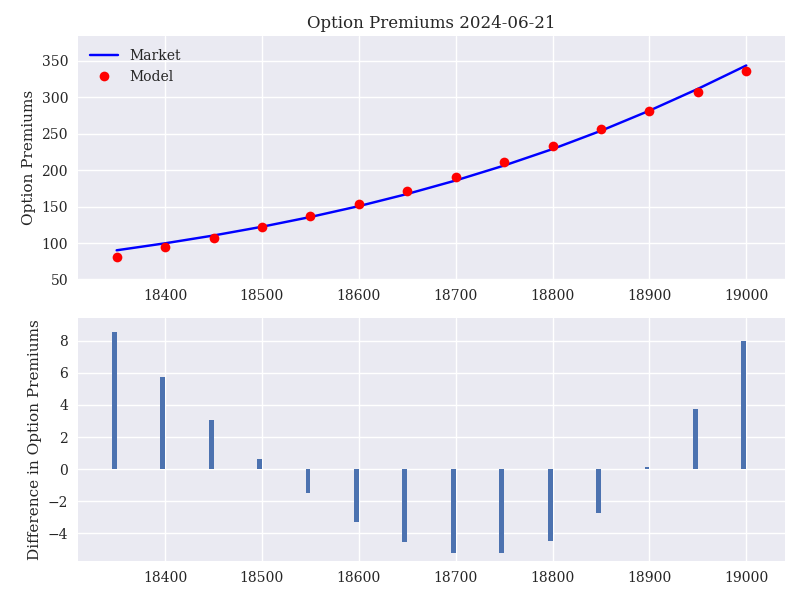

In [231]:
from IPython.display import display, Image
display(Image(filename='H93_Premiums_DAX_2024_Puts.png'))

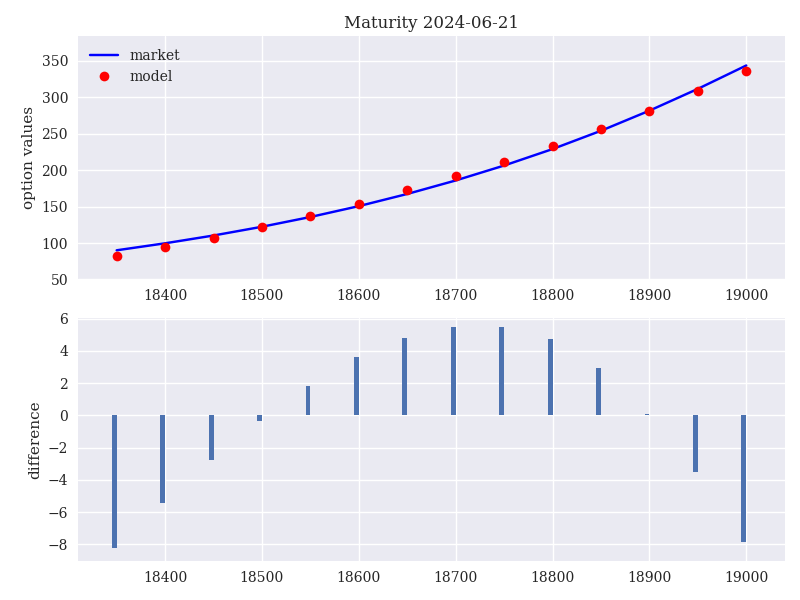

In [234]:
from IPython.display import display, Image
display(Image(filename='BCC97_jump_calibration_quotes_Puts_2024.png'))

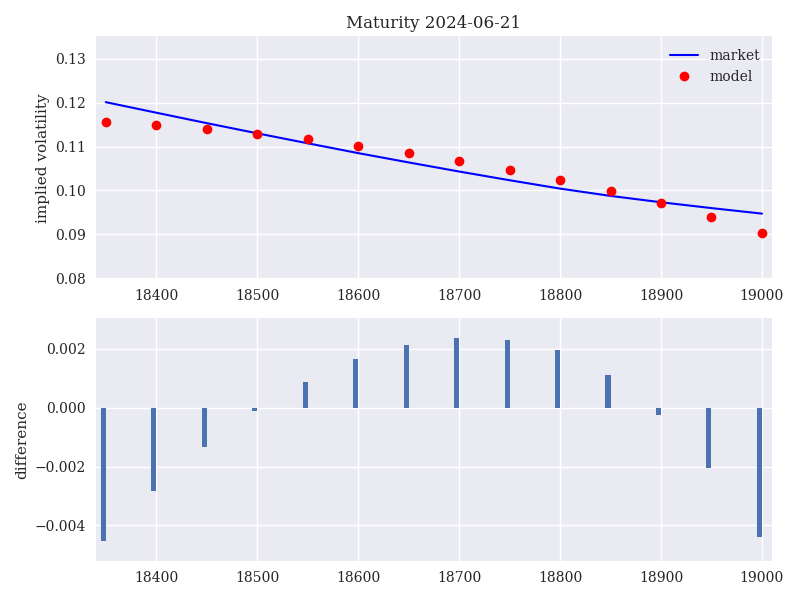

In [238]:
from IPython.display import display, Image
display(Image(filename='BCC97_Imp_Volas_DAX_2024_Puts.png'))

## B. Strenghts and weaknesses discovered during the exercise

I have started the topic of Computational Finance and in this regard option pricing from scratch. Hence, it took major effort to develop a proper "feeling" of sensitivities of option prices to volatilities, base rates, etc. as well as for the code itself.

The materials provided in this regard across the books, the code library and the live sessions are of high value-add and quality. So, it has been a great pleasure to run this practice project as it provided a very strong and deep learning curve.

## C. Experiences made throughout the exercise

N/A. See above under Section B.

## D. Opportunities to improve the existing materials and resources

As already mentioned above - the materials provided across the books, the code library and the live sessions on the portal are super strong and help to generate a very strong and deep learning curve when running the exercise.

What in my opinion comes short by this point across the materials provided is the handling of put options. All materials discuss call options only and dervive put options (if at all) via **Put Call Parity**. It'll be very sensible to extend the materials to a proper handling of put options as well.

# Archive // Not to be used

### Performance of the General Market Model (BCC) for calibration purposes 

### Calibration of the premiums of European call options

For the General Market Model, we observe a rather poor performance on the estimation of call premiums against the call premiums observed in the market. For the eight price points used for calibration purposes (i.e., strikes between 10'150 and 10'500), we see a flattened curve of the modelled call premiums against the call premiums observed in the market.

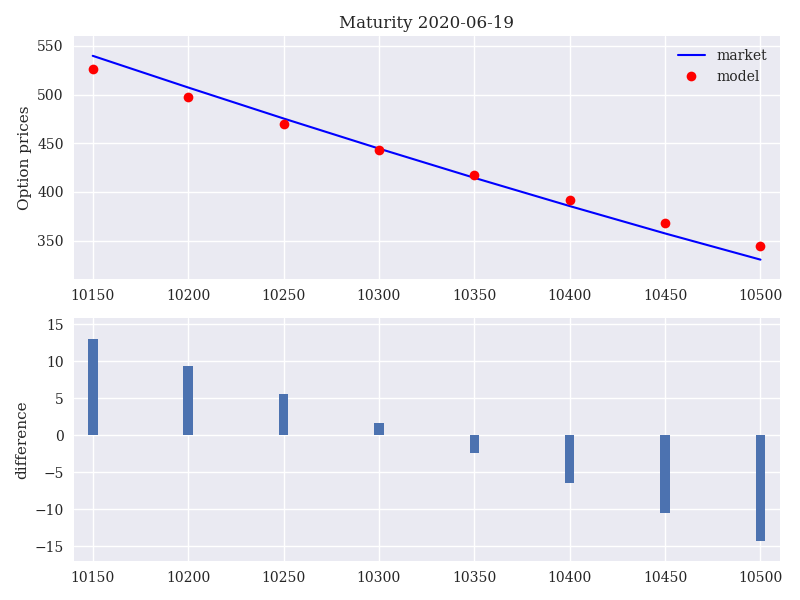

In [86]:
from IPython.display import display, Image
display(Image(filename='Valuation_DAX_BCC97.png'))

### Calibration of the implied volatilities of European call options

As to be expected from the flattened premiums' curve, modelled implied volatilities as well are **"flat"** against the implied volas sourcing from the base data / from the premiums observed in the market.

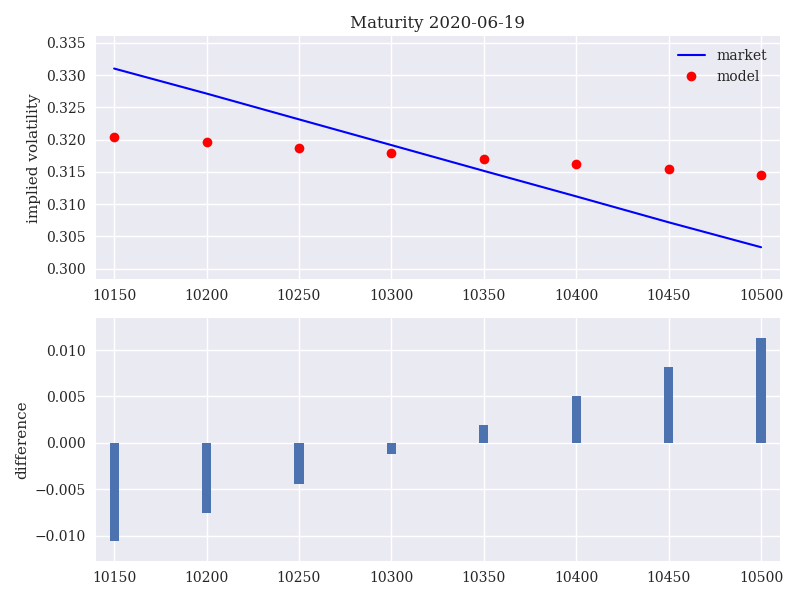

In [96]:
from IPython.display import display, Image
display(Image(filename='Imp_Volas_DAX_BCC97.png'))

## B. Strenghts and weaknesses discovered during the exercise

## C. Experiences made throughout the exercise

# Archive // Not to be used

# Test

In [96]:
from pylab import plt
plt.show('Imp_Volas_DAX_Base Data.png')

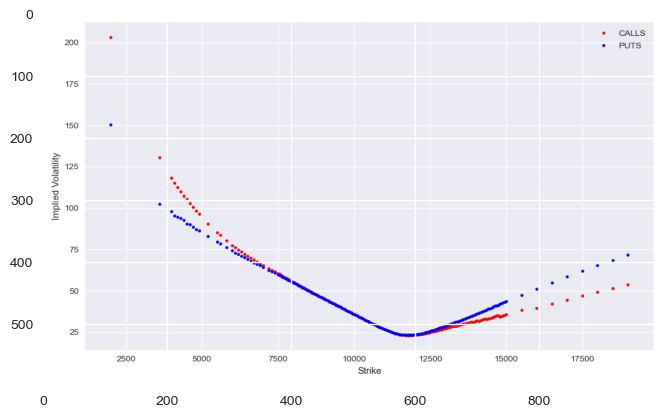

<Figure size 2000x2000 with 0 Axes>

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('seaborn-v0_8')
img = mpimg.imread('Imp_Volas_DAX_Base Data.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(20, 20))
plt.show()

In [106]:
from PIL import Image

image = Image.open('Imp_Volas_DAX_Base Data.png')
image.show()

In [ ]:
plt.imshow('Imp_Volas_DAX_Base Data.png')

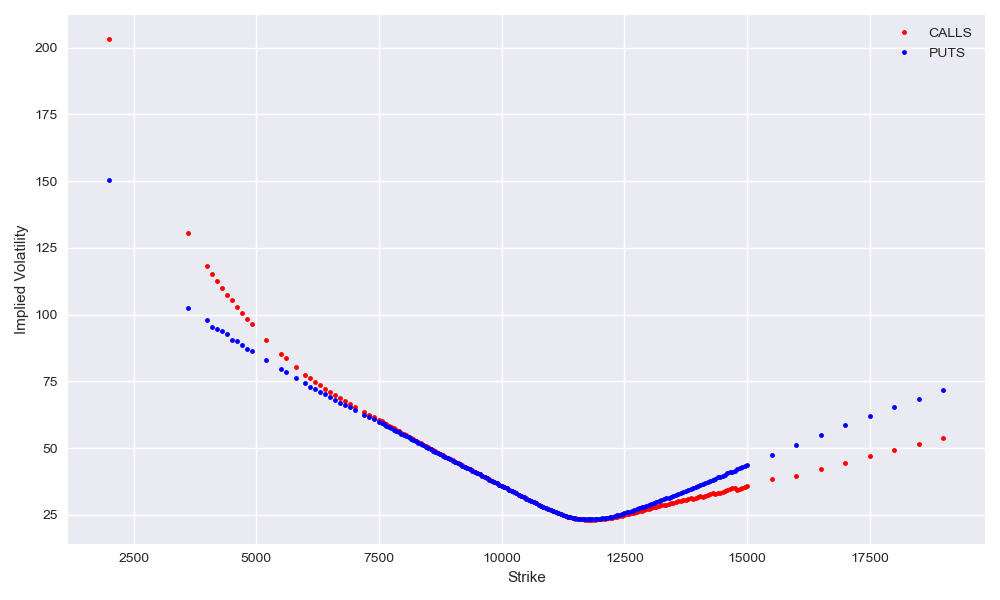

In [124]:
from IPython.display import display, Image
display(Image(filename='Imp_Volas_DAX_Base Data.png'))

$$
S_{0}-\frac{\sqrt{S_{0}K}e^{-rT/2}}{\pi}\int_{0}^{\infty} \mathbf{Re}\left[e^{izk} \varphi_{0}^{M76}(z-i/2,T)\right] \frac{dz}{z^2+1/4}
$$